In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model,Input
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import glob

5.1

In [8]:
filenames = glob.glob('people/lfw/**/*.jpg',recursive = True)
all_imgs = []
for i in range(len(filenames)):
    img = image.load_img(filenames[i],target_size=(80,80),interpolation='nearest')
    img = image.img_to_array(img)
    img = img/255
    all_imgs.append(img)

all_images = np.array(all_imgs)


train_x,val_x = train_test_split(all_images,random_state=32,test_size=0.3)

5.2

In [9]:
noise_factor = 0.3 #0-1
Nmean = 0
Nstd = 1
x_train_noisy = train_x + (noise_factor*np.random.normal(loc=Nmean,scale=Nstd,size=train_x.shape))
x_val_noisy = val_x + (noise_factor*np.random.normal(loc=Nmean,scale=Nstd,size=val_x.shape))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


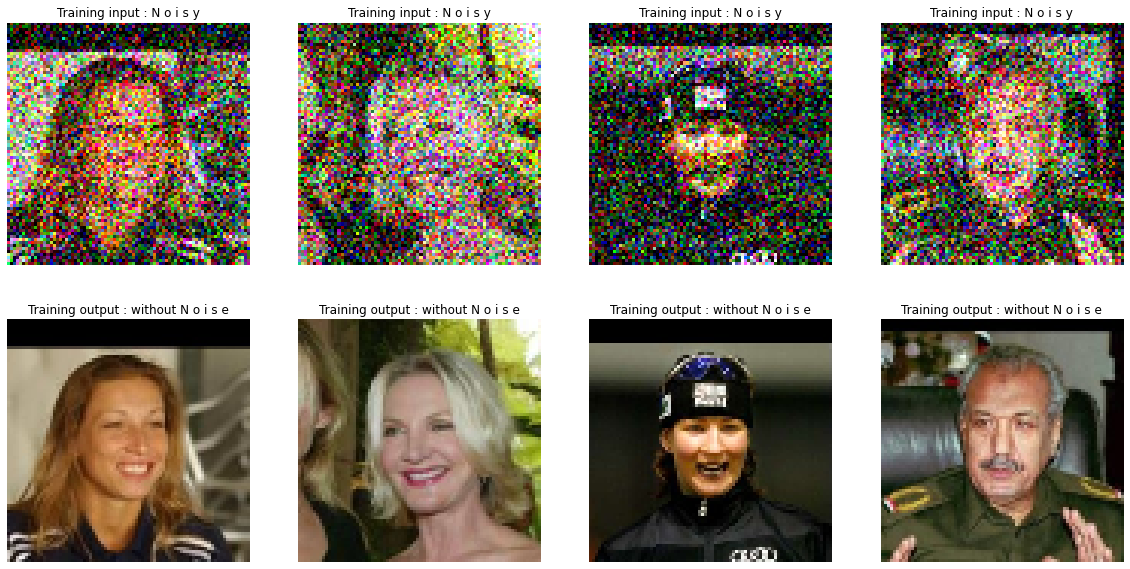

In [10]:
plt.figure(figsize=(20,10))

for i in range(8):
    ax = plt.subplot(2 , 4,i+1)
    if i < 4:
        ax = plt.title("Training input : N o i s y")
        ax = plt.imshow(x_val_noisy[i,:,:,:])
    else:
        ax = plt.title("Training output : without N o i s e")
        ax = plt.imshow(val_x[i-4,:,:,:])
    ax = plt.axis('off')
plt.show()

5.3

In [11]:
#Encoder
Input_img = Input(shape=(80,80,3))

x1 = Conv2D(256,(3,3),activation='relu',padding='same')(Input_img)
x2 = Conv2D(128,(3,3),activation='relu',padding='same')(x1)
x2 = MaxPool2D((2,2))(x2)#(Input(shape=(40,40,3)))
encoded = Conv2D(64,(3,3),activation='relu',padding='same')(x2)

#Decoder
x3 = Conv2D(64,(3,3),activation='relu',padding='same')(encoded)
x3 = UpSampling2D((2,2))(x3)
x2 = Conv2D(128,(3,3),activation='relu',padding='same')(x3)
x1 = Conv2D(256,(3,3),activation='relu',padding='same')(x2)
decoded = Conv2D(3,(3,3),padding='same')(x1)

autoencoder = Model(Input_img,decoded)
autoencoder.compile(optimizer='adam',loss='mse')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 80, 80, 256)       7168      
                                                                 
 conv2d_8 (Conv2D)           (None, 80, 80, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 40, 40, 64)        73792     
                                                                 
 conv2d_10 (Conv2D)          (None, 40, 40, 64)        36928     
                                                           

In [12]:
#epoch = [2,3,4]
#batch_size = [8,16,32]
#early_stopper = EarlyStopping(monitor='val_loss')
early_stopper = EarlyStopping()
history = autoencoder.fit(x_train_noisy,train_x
,epochs=2,batch_size=32
,shuffle=True
,validation_data=(x_val_noisy,val_x)
,callbacks=[early_stopper])

predictions = autoencoder.predict(x_val_noisy)

Epoch 1/2
290/290 [==============================] - 2045s 7s/step - loss: 0.0108 - val_loss: 0.0057
Epoch 2/2
290/290 [==============================] - 2900s 10s/step - loss: 0.0049 - val_loss: 0.0047


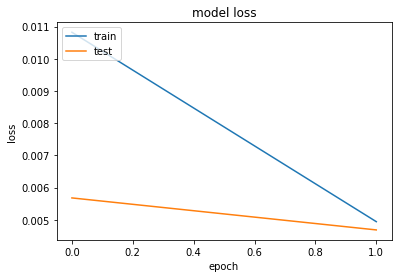

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

(3970, 80, 80, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


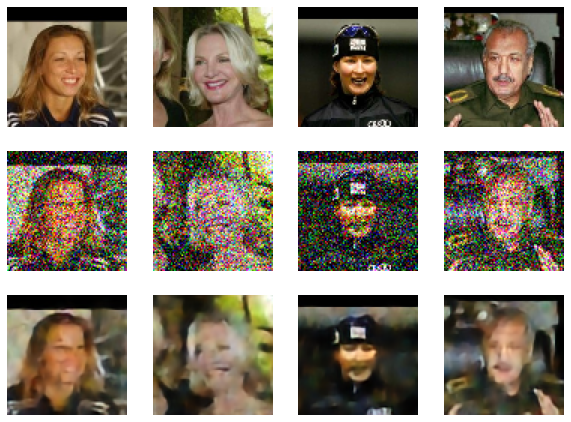

In [16]:
print(predictions.shape)
plt.figure(figsize=(10,7.5))

for i in range(12):
    ax = plt.subplot(3 , 4,i+1)
    if i < 4:
        ax = plt.imshow(val_x[i,:,:,:])
    elif i < 8:
        ax = plt.imshow(x_val_noisy[i-4,:,:,:])
    else:
        ax = plt.imshow(predictions[i-8,:,:,:])
    ax = plt.axis('off')
plt.show()

In [15]:
# f, ax = plt.subplots(2,4)

# ax[0,0].imshow(x_val_noisy[np.random(1,8)])
# ax[0,0].set_title('Image #1')

# ax[0,1].imshow(x_val_noisy[1])
# ax[0,1].set_title('Image #2')

# ax[0,2].imshow(x_train_noisy[2])
# ax[0,2].set_title('Image #3')

# ax[0,3].imshow(x_train_noisy[3])
# ax[0,3].set_title('Image #4')

# ax[1,0].imshow(all_images[0])
# ax[1,0].set_title('Image #1')

# ax[1,1].imshow(all_images[1])
# ax[1,1].set_title('Image #2')

# ax[1,2].imshow(all_images[2])
# ax[1,2].set_title('Image #3')

# ax[1,3].imshow(all_images[3])
# ax[1,3].set_title('Image #4')